In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
print("="*80)
print("CAMPUS LOST AND FOUND - DATA EXPLORATION")
print("="*80)

# Load metadata
metadata_path = Path('../dataset/metadata_labelled.json')
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(metadata)

print(f"\n✓ Loaded {len(df)} items from metadata")
print(f"\nDataFrame Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

CAMPUS LOST AND FOUND - DATA EXPLORATION

✓ Loaded 1308 items from metadata

DataFrame Shape: (1308, 7)

Columns: ['id', 'filename', 'category', 'timestamp', 'status', 'description', 'labelled']


In [3]:
print("\n" + "="*80)
print("BASIC STATISTICS")
print("="*80)

print("\n📊 Dataset Overview:")
print(df.info())

print("\n📈 Summary Statistics:")
print(df.describe(include='all'))

print("\n🔍 Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values found!")

print("\n📝 Sample Records:")
print(df.head(10))


BASIC STATISTICS

📊 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1308 non-null   object
 1   filename     1308 non-null   object
 2   category     1308 non-null   object
 3   timestamp    1308 non-null   object
 4   status       1308 non-null   object
 5   description  1308 non-null   object
 6   labelled     1308 non-null   bool  
dtypes: bool(1), object(6)
memory usage: 62.7+ KB
None

📈 Summary Statistics:
                                          id              filename  \
count                                   1308                  1308   
unique                                  1308                  1308   
top     9e7c76f7-4608-4efe-9aff-aca74f201e3f  water_bottle_413.jpg   
freq                                       1                     1   

             category                   timestamp status 


CATEGORY ANALYSIS

📦 Items per Category:
category
water_bottles     413
wallets           261
bags              151
earphones         138
calculators       100
computer-mouse     94
glasses            83
books              25
keys               22
id_cards           21
Name: count, dtype: int64

✓ Saved: category_distribution.png


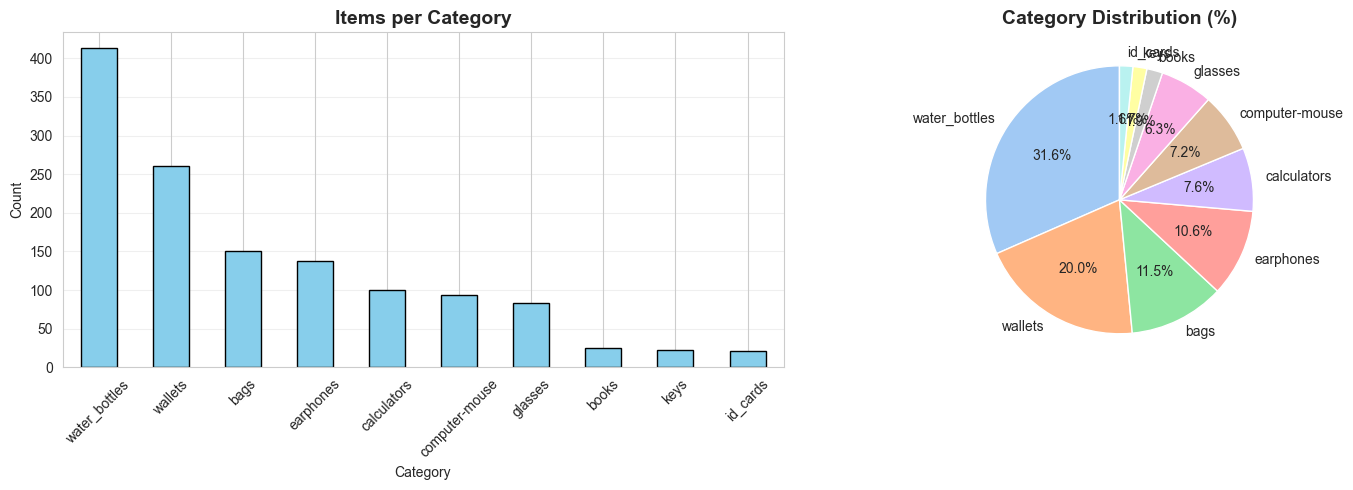

In [6]:
print("\n" + "="*80)
print("CATEGORY ANALYSIS")
print("="*80)

category_counts = df['category'].value_counts()
print("\n📦 Items per Category:")
print(category_counts)

# Plot category distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
category_counts.plot(
    kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Items per Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette("pastel"))
axes[1].set_title('Category Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../notebooks/figures/category_distribution.png',
            dpi=300, bbox_inches='tight')
print("\n✓ Saved: category_distribution.png")
plt.show()


STATUS ANALYSIS (Lost vs Found)

🔎 Overall Status Distribution:
status
lost     673
found    635
Name: count, dtype: int64

Lost/Found Ratio: 1.06

📊 Status by Category:
status          found  lost
category                   
bags               69    82
books              11    14
calculators        49    51
computer-mouse     41    53
earphones          68    70
glasses            44    39
id_cards           14     7
keys               10    12
wallets           123   138
water_bottles     206   207

✓ Saved: status_distribution.png


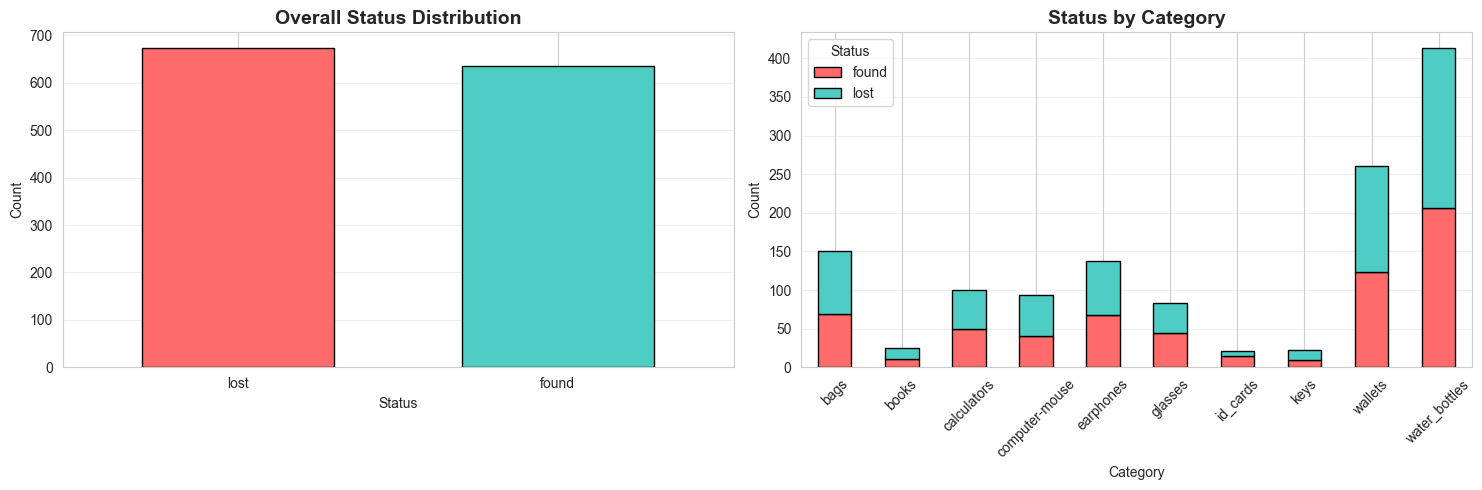

In [7]:
print("\n" + "="*80)
print("STATUS ANALYSIS (Lost vs Found)")
print("="*80)

status_counts = df['status'].value_counts()
print("\n🔎 Overall Status Distribution:")
print(status_counts)
print(
    f"\nLost/Found Ratio: {status_counts['lost']/status_counts['found']:.2f}")

# Status by category
status_by_category = pd.crosstab(df['category'], df['status'])
print("\n📊 Status by Category:")
print(status_by_category)

# Plot status distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Overall status
status_counts.plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#4ecdc4'],
                   edgecolor='black', width=0.6)
axes[0].set_title('Overall Status Distribution',
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Status by category (stacked)
status_by_category.plot(kind='bar', stacked=True, ax=axes[1],
                        color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
axes[1].set_title('Status by Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].legend(title='Status')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../notebooks/figures/status_distribution.png',
            dpi=300, bbox_inches='tight')
print("\n✓ Saved: status_distribution.png")
plt.show()


DESCRIPTION ANALYSIS

📝 Description Availability:
labelled
True    1308
Name: count, dtype: int64

Percentage with descriptions: 100.00%

📊 Description Availability by Category (%):
labelled         True
category             
bags            100.0
books           100.0
calculators     100.0
computer-mouse  100.0
earphones       100.0
glasses         100.0
id_cards        100.0
keys            100.0
wallets         100.0
water_bottles   100.0

📏 Description Length Statistics:
count    1308.000000
mean       26.941896
std         6.556539
min         6.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        54.000000
Name: desc_length, dtype: float64

✓ Saved: description_analysis.png


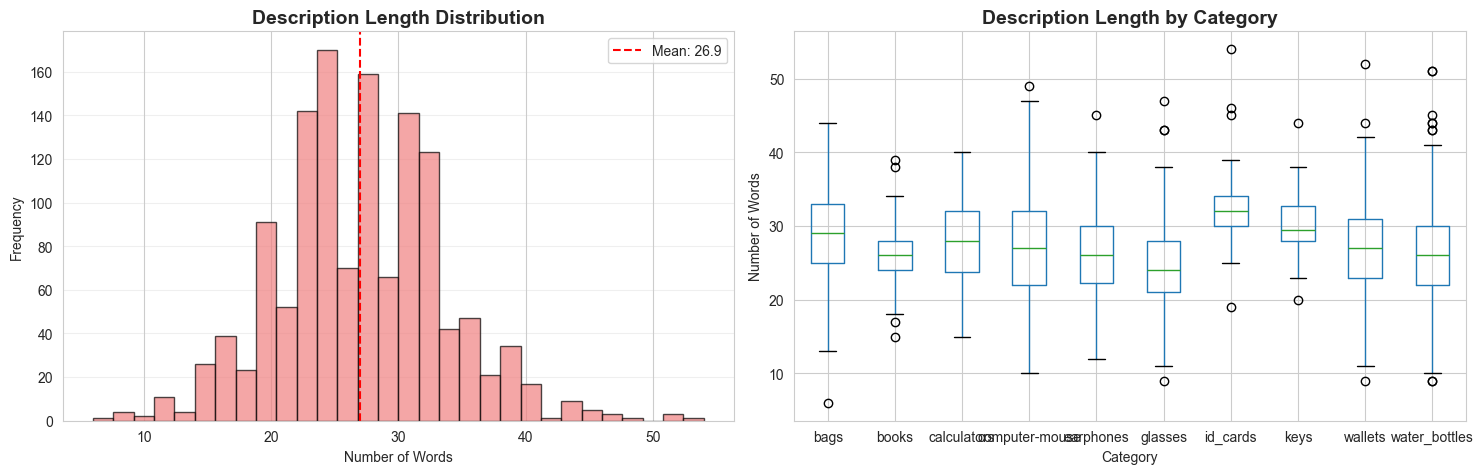


📖 Sample Descriptions:

earphones (found):
  → This is a pair of wired, on-ear headphones, primarily grey and silver with black earcups. A black ca...

water_bottles (lost):
  → The item is a grey, cylindrical bottle with a black lid. Its body features subtle horizontal ridges....

earphones (found):
  → This item is a pair of wireless over-ear headphones, featuring black earcups and a black headband. T...

earphones (lost):
  → A person wearing a white shirt and blue tie is seen from the side, listening intently through a pair...

water_bottles (found):
  → This is a blurry image depicting a person and a light-colored, amorphous object on a green grassy ba...


In [8]:
print("\n" + "="*80)
print("DESCRIPTION ANALYSIS")
print("="*80)

labelled_counts = df['labelled'].value_counts()
print("\n📝 Description Availability:")
print(labelled_counts)
print(
    f"\nPercentage with descriptions: {labelled_counts[True]/len(df)*100:.2f}%")

# Description availability by category
desc_by_category = pd.crosstab(
    df['category'], df['labelled'], normalize='index') * 100
print("\n📊 Description Availability by Category (%):")
print(desc_by_category.round(2))

# Analyze description lengths (for labelled items)
df_labelled = df[df['labelled'] == True].copy()
if len(df_labelled) > 0:
    df_labelled['desc_length'] = df_labelled['description'].apply(
        lambda x: len(str(x).split()) if pd.notna(x) else 0
    )

    print(f"\n📏 Description Length Statistics:")
    print(df_labelled['desc_length'].describe())

    # Plot description lengths
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Histogram
    axes[0].hist(df_labelled['desc_length'], bins=30, color='lightcoral',
                 edgecolor='black', alpha=0.7)
    axes[0].set_title('Description Length Distribution',
                      fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Number of Words')
    axes[0].set_ylabel('Frequency')
    axes[0].axvline(df_labelled['desc_length'].mean(), color='red',
                    linestyle='--', label=f"Mean: {df_labelled['desc_length'].mean():.1f}")
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # Box plot by category
    df_labelled.boxplot(column='desc_length', by='category', ax=axes[1])
    axes[1].set_title('Description Length by Category',
                      fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Category')
    axes[1].set_ylabel('Number of Words')
    plt.suptitle('')

    plt.tight_layout()
    plt.savefig('../notebooks/figures/description_analysis.png',
                dpi=300, bbox_inches='tight')
    print("\n✓ Saved: description_analysis.png")
    plt.show()

    # Sample descriptions
    print("\n📖 Sample Descriptions:")
    for idx, row in df_labelled.sample(min(5, len(df_labelled))).iterrows():
        print(f"\n{row['category']} ({row['status']}):")
        print(f"  → {row['description'][:100]}...")


TEMPORAL ANALYSIS

📅 Date Range:
  Start: 2025-11-17 14:54:21.560630
  End: 2025-11-17 14:54:21.602349
  Duration: 0 days

📊 Average items per day: 1308.00

✓ Saved: temporal_analysis.png


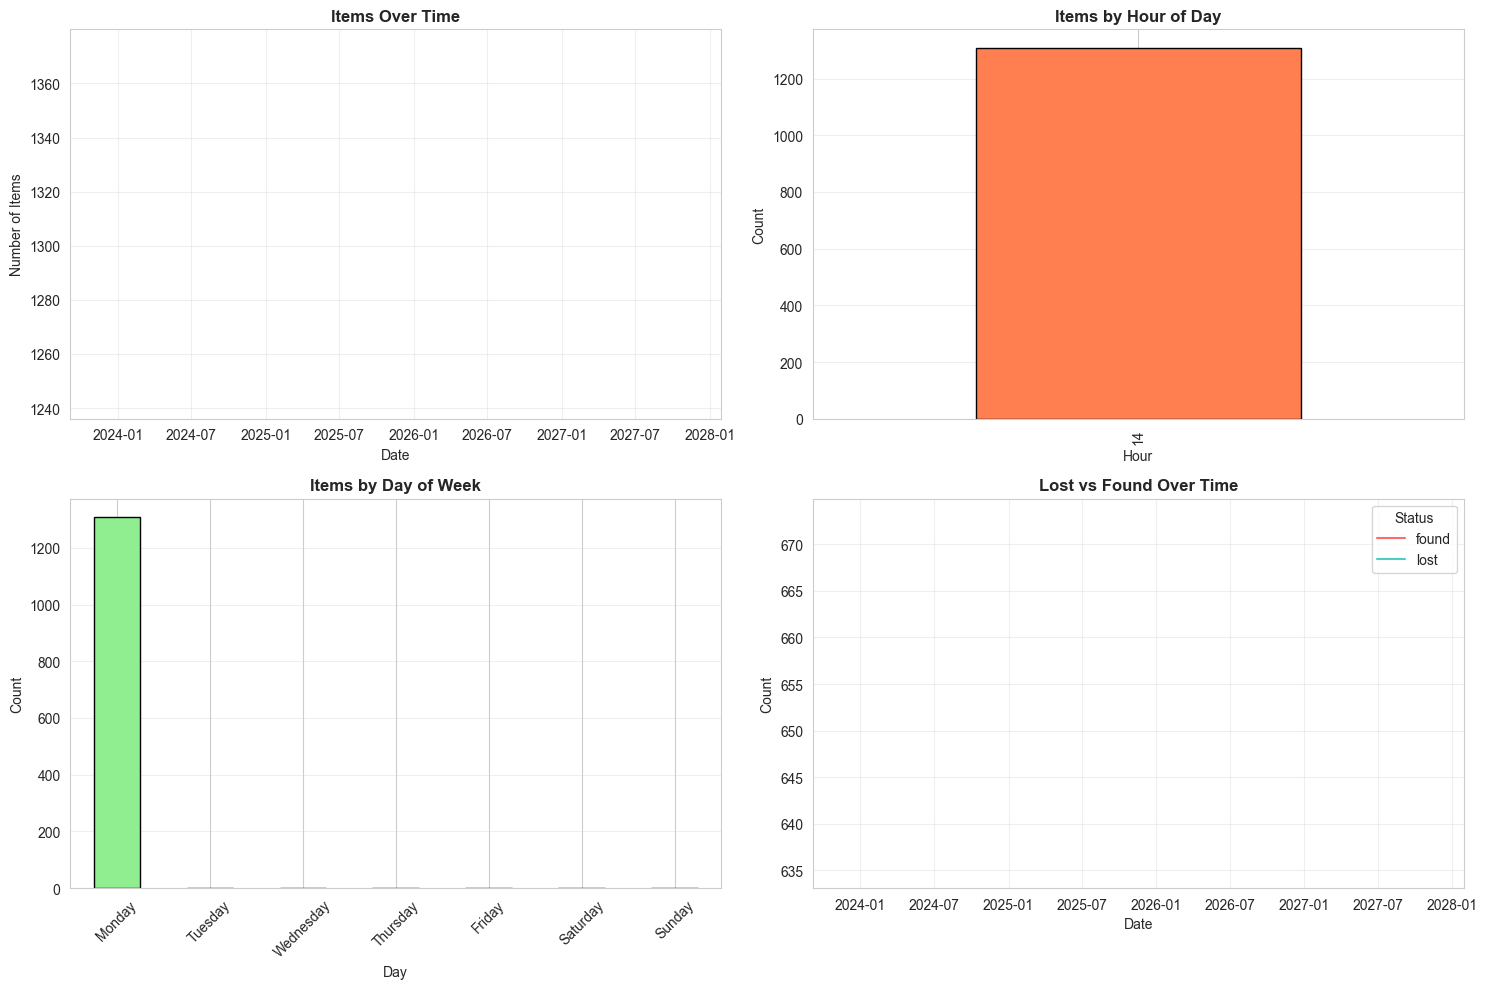

In [9]:
print("\n" + "="*80)
print("TEMPORAL ANALYSIS")
print("="*80)

# Convert timestamp to datetime
df['datetime'] = pd.to_datetime(df['timestamp'])
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

print("\n📅 Date Range:")
print(f"  Start: {df['datetime'].min()}")
print(f"  End: {df['datetime'].max()}")
print(f"  Duration: {(df['datetime'].max() - df['datetime'].min()).days} days")

# Items per day
items_per_day = df.groupby('date').size()
print(f"\n📊 Average items per day: {items_per_day.mean():.2f}")

# Plot temporal patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Items over time
df.groupby('date').size().plot(ax=axes[0, 0], color='steelblue', linewidth=2)
axes[0, 0].set_title('Items Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Items')
axes[0, 0].grid(alpha=0.3)

# Hour of day distribution
df['hour'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1], color='coral', edgecolor='black')
axes[0, 1].set_title('Items by Hour of Day', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(axis='y', alpha=0.3)

# Day of week distribution
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order)
day_counts.plot(kind='bar', ax=axes[1, 0],
                color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Items by Day of Week', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Day')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Status over time
df.groupby([df['date'], 'status']).size().unstack().plot(ax=axes[1, 1], color=['#ff6b6b', '#4ecdc4'])
axes[1, 1].set_title('Lost vs Found Over Time', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Status')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../notebooks/figures/temporal_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: temporal_analysis.png")
plt.show()


IMAGE ANALYSIS

📸 Successfully loaded 1308 images

📊 Image Statistics:
             width       height  aspect_ratio      size_kb
count  1308.000000  1308.000000   1308.000000  1308.000000
mean    312.179664   328.321101      1.016461    33.108599
std     346.145176   431.107159      0.235845   176.436203
min      32.000000    32.000000      0.424316     0.856445
25%      32.000000    32.000000      1.000000     1.426758
50%     240.000000   228.500000      1.000000     8.105957
75%     504.500000   500.000000      1.000000    18.479248
max    3024.000000  4032.000000      2.222222  2221.845703

🎨 Image Modes:
mode
RGB    1306
L         2
Name: count, dtype: int64

✓ Saved: image_analysis.png


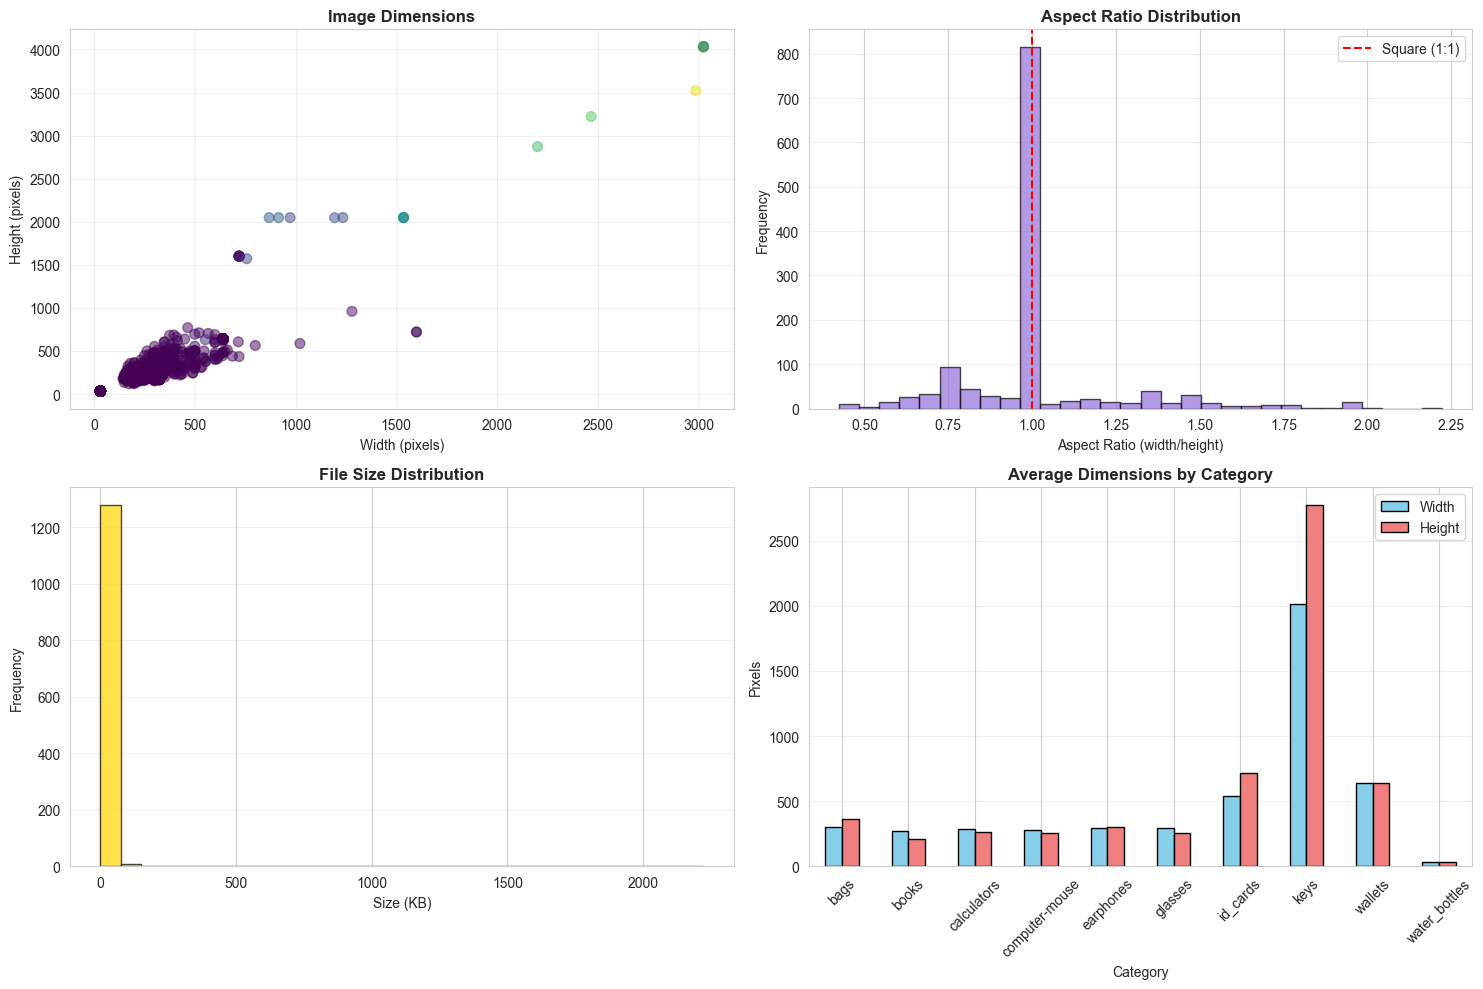

In [11]:
print("\n" + "="*80)
print("IMAGE ANALYSIS")
print("="*80)

# Check image files
image_base_path = Path('../dataset/images')
image_info = []

for idx, row in df.iterrows():
    img_path = image_base_path / row['category'] / row['filename']

    if img_path.exists():
        try:
            img = Image.open(img_path)
            image_info.append({
                'id': row['id'],
                'category': row['category'],
                'width': img.width,
                'height': img.height,
                'aspect_ratio': img.width / img.height,
                'mode': img.mode,
                'size_kb': img_path.stat().st_size / 1024
            })
        except Exception as e:
            print(f"⚠ Error loading {img_path}: {e}")
    else:
        print(f"⚠ Missing image: {img_path}")

img_df = pd.DataFrame(image_info)

print(f"\n📸 Successfully loaded {len(img_df)} images")
print(f"\n📊 Image Statistics:")
print(img_df[['width', 'height', 'aspect_ratio', 'size_kb']].describe())

print(f"\n🎨 Image Modes:")
print(img_df['mode'].value_counts())

# Plot image statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Image dimensions scatter
axes[0, 0].scatter(img_df['width'], img_df['height'], alpha=0.5, c=img_df['size_kb'],
                   cmap='viridis', s=50)
axes[0, 0].set_title('Image Dimensions', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Width (pixels)')
axes[0, 0].set_ylabel('Height (pixels)')
axes[0, 0].grid(alpha=0.3)

# Aspect ratio distribution
axes[0, 1].hist(img_df['aspect_ratio'], bins=30, color='mediumpurple',
                edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Aspect Ratio Distribution',
                     fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Aspect Ratio (width/height)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(1.0, color='red', linestyle='--', label='Square (1:1)')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# File size distribution
axes[1, 0].hist(img_df['size_kb'], bins=30, color='gold',
                edgecolor='black', alpha=0.7)
axes[1, 0].set_title('File Size Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Size (KB)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(axis='y', alpha=0.3)

# Average dimensions by category
# img_df already contains the 'category' column, no merge required
avg_dims = img_df.groupby('category')[['width', 'height']].mean()
avg_dims.plot(kind='bar', ax=axes[1, 1], color=['skyblue', 'lightcoral'],
              edgecolor='black')
axes[1, 1].set_title('Average Dimensions by Category',
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Pixels')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(['Width', 'Height'])
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../notebooks/figures/image_analysis.png',
            dpi=300, bbox_inches='tight')
print("\n✓ Saved: image_analysis.png")
plt.show()


SAMPLE IMAGES

✓ Saved: sample_images.png


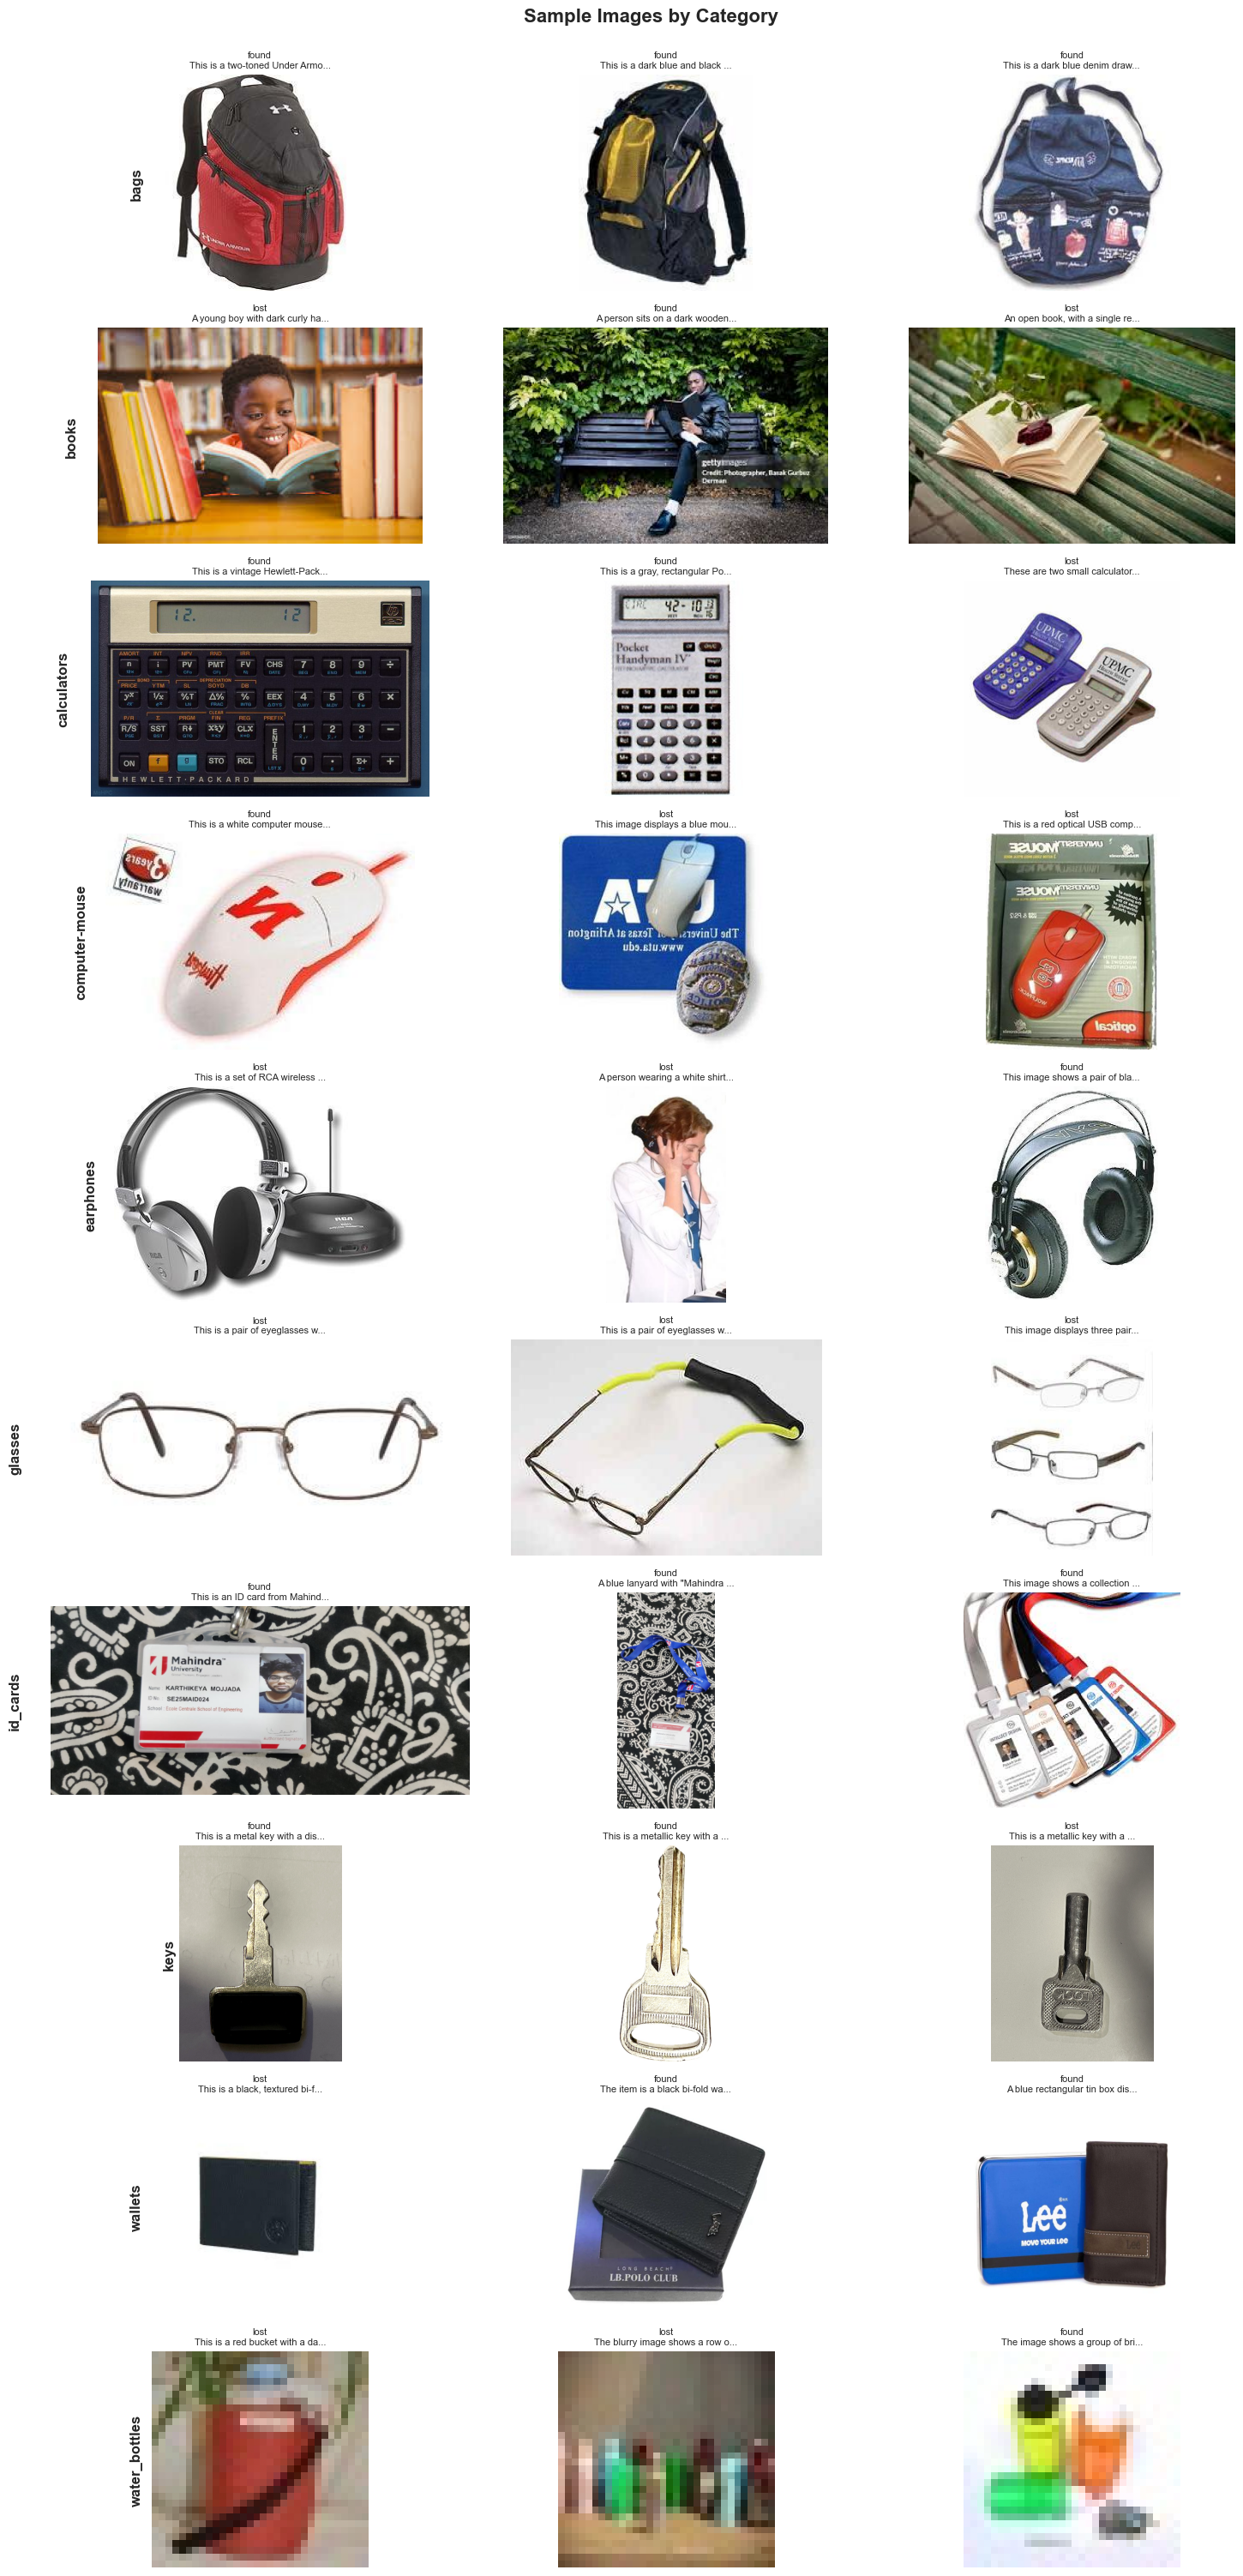

In [12]:
print("\n" + "="*80)
print("SAMPLE IMAGES")
print("="*80)

# Display sample images from each category
categories = df['category'].unique()
n_categories = len(categories)
n_samples = 3  # samples per category

fig, axes = plt.subplots(n_categories, n_samples,
                         figsize=(15, n_categories * 3))

for i, category in enumerate(categories):
    category_items = df[df['category'] == category].sample(
        min(n_samples, len(df[df['category'] == category])))

    for j, (idx, row) in enumerate(category_items.iterrows()):
        img_path = image_base_path / row['category'] / row['filename']

        if img_path.exists():
            try:
                img = Image.open(img_path)
                ax = axes[i, j] if n_categories > 1 else axes[j]
                ax.imshow(img)
                ax.axis('off')
                title = f"{row['status']}\n{row['description'][:30] if pd.notna(row['description']) else 'No description'}..."
                ax.set_title(title, fontsize=8)
            except Exception as e:
                ax = axes[i, j] if n_categories > 1 else axes[j]
                ax.text(0.5, 0.5, f"Error: {e}", ha='center', va='center')
                ax.axis('off')

    # Add category label
    if n_categories > 1:
        axes[i, 0].text(-0.1, 0.5, category, transform=axes[i, 0].transAxes,
                        fontsize=12, fontweight='bold', va='center', rotation=90)

plt.suptitle('Sample Images by Category',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../notebooks/figures/sample_images.png',
            dpi=300, bbox_inches='tight')
print("\n✓ Saved: sample_images.png")
plt.show()


KEYWORD ANALYSIS

🔤 Top 20 Keywords:
  black............... 409
  features............ 372
  image............... 367
  dark................ 276
  featuring........... 273
  blue................ 267
  white............... 206
  pair................ 191
  visible............. 178
  rectangular......... 161
  light............... 158
  top................. 156
  displays............ 151
  front............... 150
  wallet.............. 148
  red................. 140
  item................ 136
  blurry.............. 134
  two................. 132
  bottle.............. 130

✓ Saved: keyword_analysis.png


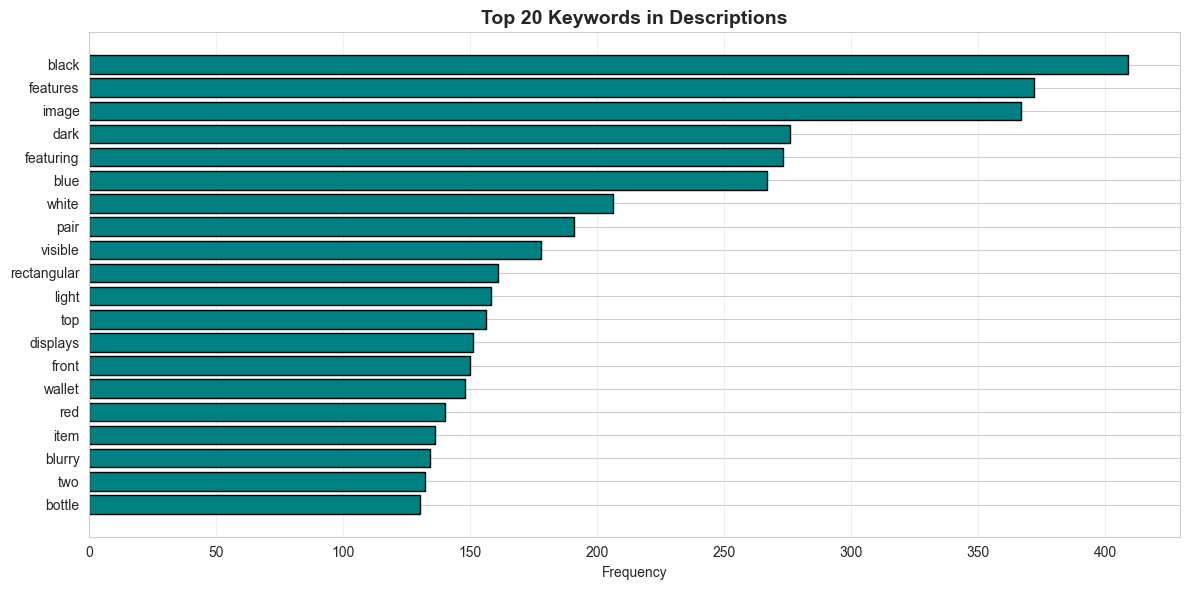

In [13]:
print("\n" + "="*80)
print("KEYWORD ANALYSIS")
print("="*80)

if len(df_labelled) > 0:
    # Extract all words from descriptions
    all_words = []
    for desc in df_labelled['description'].dropna():
        words = str(desc).lower().split()
        all_words.extend(words)

    # Count word frequencies
    word_freq = Counter(all_words)

    # Remove common stop words
    stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for',
                  'of', 'with', 'is', 'was', 'are', 'were', 'been', 'be', 'have', 'has',
                  'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may',
                  'might', 'must', 'can', 'it', 'its', 'this', 'that', 'these', 'those'}

    filtered_freq = {word: count for word, count in word_freq.items()
                     if word not in stop_words and len(word) > 2}

    # Top keywords
    top_keywords = sorted(filtered_freq.items(),
                          key=lambda x: x[1], reverse=True)[:20]

    print("\n🔤 Top 20 Keywords:")
    for word, count in top_keywords:
        print(f"  {word:.<20} {count}")

    # Plot top keywords
    words, counts = zip(*top_keywords)
    plt.figure(figsize=(12, 6))
    plt.barh(words, counts, color='teal', edgecolor='black')
    plt.xlabel('Frequency')
    plt.title('Top 20 Keywords in Descriptions',
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../notebooks/figures/keyword_analysis.png',
                dpi=300, bbox_inches='tight')
    print("\n✓ Saved: keyword_analysis.png")
    plt.show()

In [15]:
print("\n" + "="*80)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("="*80)

print("\n📌 DATASET SUMMARY:")
print(f"  • Total Items: {len(df)}")
print(f"  • Categories: {len(df['category'].unique())}")
print(f"  • Lost Items: {len(df[df['status'] == 'lost'])}")
print(f"  • Found Items: {len(df[df['status'] == 'found'])}")
print(
    f"  • Items with Descriptions: {len(df[df['labelled'] == True])} ({len(df[df['labelled'] == True])/len(df)*100:.1f}%)")
print("\n" + "="*80)
print("✅ DATA EXPLORATION COMPLETE!")
print("="*80)

# Save summary statistics to CSV
summary = {
    'total_items': len(df),
    'categories': len(df['category'].unique()),
    'lost_items': len(df[df['status'] == 'lost']),
    'found_items': len(df[df['status'] == 'found']),
    'with_descriptions': len(df[df['labelled'] == True]),
    'avg_desc_length': df_labelled['desc_length'].mean() if len(df_labelled) > 0 else 0,
}

summary_df = pd.DataFrame([summary])
summary_df.to_csv('../notebooks/data_summary.csv', index=False)
print("\n✓ Saved: data_summary.csv")


KEY INSIGHTS & RECOMMENDATIONS

📌 DATASET SUMMARY:
  • Total Items: 1308
  • Categories: 10
  • Lost Items: 673
  • Found Items: 635
  • Items with Descriptions: 1308 (100.0%)

✅ DATA EXPLORATION COMPLETE!

✓ Saved: data_summary.csv
